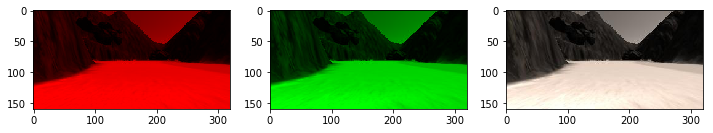

uint8 (160, 320, 3) 0 255


<function matplotlib.pyplot.show>

In [14]:
# Import some packages from matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
#%matplotlib inLine

#Define the filename for the image to plot, read and plot the image
filename = "pratImage.jpg"
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

#import the numpy package for working with arrays
import numpy as np
print(image.dtype, image.shape, np.min(image), np.max(image))
#the output of the image represent a data type of uint8 unsigned integer with 8 bits where the size of the array is
#160 pixels in the 9 direction and 320 pixels in the x direction with 3 three layers or color channels with the max and min
#values of 0 and 255


#It is better to use the np.copy function rather than just saying red_channel = image, becuase in python, a statement would set 
#the two arrays equal to each other forever, meaning any changes made to one would also be made to the other!

#Instead of extracting individual channels from the image keep all 3 color channels in each case but set the ones 
#of no interest to zero

red_channel = np.copy(image)
green_channel = np.copy(image)
blue_channel = np.copy(image)
red_channel[:,:,[1,2]] = 0 #zeros out the green and blue channel {255,0,0}
green_channel[:,:,[0,2]] = 0 #zeros out the red and blue channel {0,255,0}
blue_channel[:,:,[0, 1]] = 0
blue_channel[:,:,[0,1]] = 0 #zeros out the red and green channel {0,0,255}
#plt.imshow(red_channel)
#plt.show()
#plt.imshow(green_channel)
#plt.show()
#plt.imshow(blue_channel)
#plt.show()

#In jupyter and python it is possible to plot things in columns and rows
fig = plt.figure(figsize=(12,3)) # Creates a figure for plotting ""What does the 12 Mean?""
plt.subplot(131) #Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) #Plot the red_channel
plt.subplot(132) #initialize subplot number 2 in a fiugre that is 3 columns 1 row
plt.imshow(green_channel) #Plot the green channel
plt.subplot(133) #Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel) #Plot the blue channel
plt.show


uint8 (160, 320, 3) 0 255


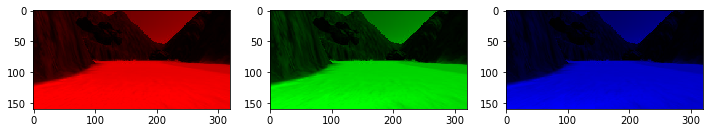

array([228, 209, 194], dtype=uint8)

In [32]:
#import the numpy package for working with arrays
import numpy as np

print(image.dtype, image.shape, np.min(image), np.max(image))
#the output of the image represent a data type of uint8 unsigned integer with 8 bits where the size of the array is
#160 pixels in the 9 direction and 320 pixels in the x direction with 3 three layers or color channels with the max and min
#values of 0 and 255


#It is better to use the np.copy function rather than just saying red_channel = image, becuase in python, a statement would set 
#the two arrays equal to each other forever, meaning any changes made to one would also be made to the other!

#Instead of extracting individual channels from the image keep all 3 color channels in each case but set the ones 
#of no interest to zero

red_channel = np.copy(image)
green_channel = np.copy(image)
blue_channel = np.copy(image)
red_channel[:,:,[1,2]] = 0 #zeros out the green and blue channel {255,0,0}
green_channel[:,:,[0,2]] = 0 #zeros out the red and blue channel {0,255,0}
blue_channel[:,:,[0,1]] = 0 #zeros out the red and green channel {0,0,255}
#plt.imshow(red_channel)
#plt.show()
#plt.imshow(green_channel)
#plt.show()
#plt.imshow(blue_channel)
#plt.show()

#In jupyter and python it is possible to plot things in columns and rows
fig = plt.figure(figsize=(12,3)) # Creates a figure for plotting ""What does the 12 Mean?""
plt.subplot(131) #Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) #Plot the red_channel
plt.subplot(132) #initialize subplot number 2 in a fiugre that is 3 columns 1 row
plt.imshow(green_channel) #Plot the green channel
plt.subplot(133) #Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel) #Plot the blue channel
plt.show()
image[100,50]
image[100,150]






In [33]:
image[100,50]
image[100,150]


array([228, 209, 194], dtype=uint8)

In [34]:
def color_thresh(img, rbg_thresh=(0,0,0)):
    image_rows, img_col, colors = img.shape
    red_channel = np.copy(img)
    green_channel = np.copy(img)
    blue_channel = np.copy(img)
    red_channel[:,:,[1,2]] = 0 #zeros out the green and blue channel {255,0,0}
    green_channel[:,:,[0,2]] = 0 #zeros out the red and blue channel {0,255,0}
    blue_channel[:,:,[0,1]] = 0 #zeros out the red and green channel {0,0,255}
    
    

In [49]:

def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######

threshold = [red_threshold, green_threshold, blue_threshold]
color_thresh(image, threshold)





array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

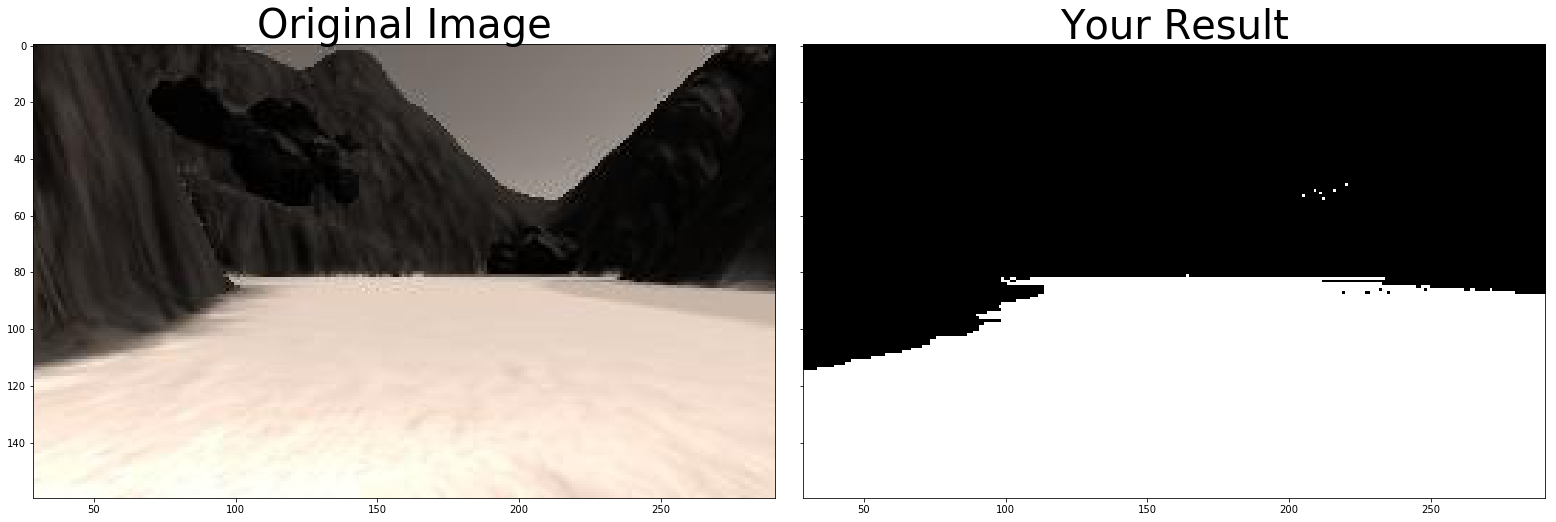

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
# There are six more images available for reading
# called sample1-6.jpg, feel free to experiment with the others!
image_name = 'pratImage.jpg'
image = mpimg.imread(image_name)

# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Apply the thresholds for RGB and assign 1's 
    # where threshold was exceeded
    # Return the single-channel binary image
    return color_select
    
# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 160
green_threshold = 160
blue_threshold = 160
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() # Uncomment if running on your local machine


In [67]:
import cv2

ModuleNotFoundError: No module named 'cv2'